<a href="https://colab.research.google.com/github/inesdarosa/titulares_diarios/blob/master/tit_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
 
files.upload()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
base_gral_senti_fecha = pd.read_csv('base_tit_senti_fecha.csv', encoding='iso8859_2')
base_gral_senti_fecha.head()

,titular,fecha,diario,sentimiento
0,"""Mirá la ceremonia de inauguración de los Jueg...",2021-07-23,elobse,NEU
1,"""El contrasentido del clásico: Peńarol perdió ...",2021-07-23,elobse,NEU
2,"""Los sueldos de $ 200.000 en el Directorio de ...",2021-07-23,elobse,NEU
3,"""żDónde se podrán ver los Juegos Olímpicos de ...",2021-07-23,elobse,NEU
4,"""Crece interés de argentinos por Montevideo: c...",2021-07-23,elobse,POS


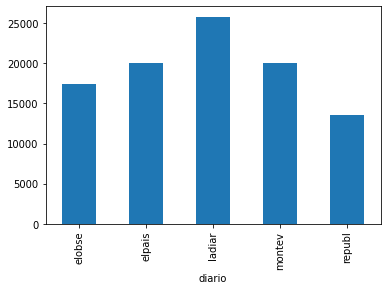

In [ ]:
base_gral_senti_fecha.groupby(['diario']).count()['sentimiento'].plot(kind='bar')# acá tengo el número de titulares por diario.

In [ ]:
import seaborn as sns

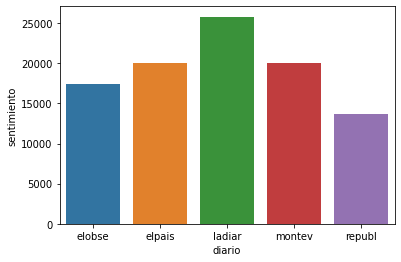

In [ ]:
grafico = base_gral_senti_fecha[['sentimiento','diario']].groupby('diario').count()
grafico = grafico.reset_index()
sns.barplot(x='diario', y='sentimiento', data=grafico)

In [ ]:
tabla_datos = pd.crosstab(index=base_gral_senti_fecha['sentimiento'],
            columns=base_gral_senti_fecha['diario'])# si saco margins=True me da solo los valores
tabla_datos

diario,elobse,elpais,ladiar,montev,republ
sentimiento,,,,,
NEG,3020,3188,3771,2879,1715
NEU,13047,14962,20602,14975,10974
POS,1401,1869,1417,2174,937


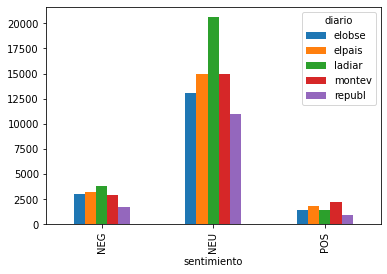

In [ ]:
tabla_datos.plot(kind='bar')

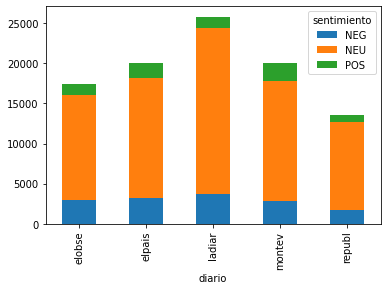

In [ ]:
grafico_1 = base_gral_senti_fecha.groupby(['diario', 'sentimiento']).size().reset_index().pivot(columns='sentimiento', index='diario', values=0)
grafico_1.plot(kind='bar', stacked=True)
# size() en pandas devuelve el número de elementos, filas, etc.

In [ ]:
# esto lo saqué de: https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/
# Esto muestra porcentajes por diarios de las etiquetas de sentimiento.

pd.crosstab(index=base_gral_senti_fecha['sentimiento'], columns=base_gral_senti_fecha['diario']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

diario,elobse,elpais,ladiar,montev,republ
sentimiento,,,,,
NEG,17.288757,15.924871,14.621946,14.374875,12.586232
NEU,74.690863,74.738998,79.883676,74.770322,80.537208
POS,8.020380,9.336131,5.494378,10.854803,6.876560


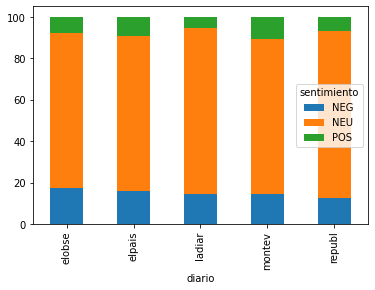

In [ ]:
# esto lo saqué de: https://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/

plot = pd.crosstab(index=base_gral_senti_fecha['diario'],
            columns=base_gral_senti_fecha['sentimiento']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=1).plot(kind='bar', stacked=True)

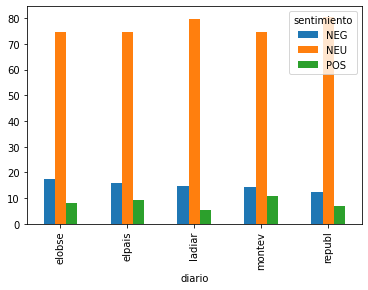

In [ ]:
plot = pd.crosstab(index=base_gral_senti_fecha['diario'],
            columns=base_gral_senti_fecha['sentimiento']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

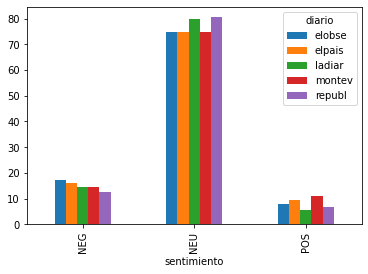

In [ ]:
plot = pd.crosstab(index=base_gral_senti_fecha['sentimiento'],
            columns=base_gral_senti_fecha['diario']).apply(lambda r: r/r.sum() *100,
                                              axis=0).plot(kind='bar')

In [ ]:
# Esto para mí no está bien porque considera al total como una cosa única (por ejemplo la cantidad de asientos en un avión, 1er clase, 2da, clase, etc)
# y en realidad los datos por diario son independientes de los otros, sobre todo porque hay fechas que no tengo algunos diarios.
# No lo tengo claro. Para hacer esto tendría que trabajar con los diarios que comparten fechas.

pd.crosstab(index=base_gral_senti_fecha['diario'], columns=base_gral_senti_fecha['sentimiento'],
            margins=True).apply(lambda r: r/len(base_gral_senti_fecha) *100,
                                axis=1)

sentimiento,NEG,NEU,POS,All
diario,,,,
elobse,3.115618,13.460090,1.445358,18.021067
elpais,3.288937,15.435722,1.928176,20.652836
ladiar,3.890396,21.254294,1.461865,26.606555
montev,2.970154,15.449134,2.242833,20.662120
republ,1.769300,11.321455,0.966667,14.057422
All,15.034406,76.920696,8.044898,100.000000


In [ ]:
# No me corre por falta de memoria RAM, tengo que ver si el problema es con mi máquina y colab que no encara, porque tuve un problema
# parecido, como que mi máquina no se conecta a la ram de colab, algo así. El tutorial para hacer pca con texto esta:
# https://www.youtube.com/watch?v=-6pxXdzlus8 

! pip install texthero -q

     |████████████████████████████████| 235 kB 6.3 MB/s 
     |████████████████████████████████| 10.4 MB 66.3 MB/s 
     |████████████████████████████████| 184 kB 74.8 MB/s 
     |████████████████████████████████| 1.0 MB 61.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.0 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.7 which is incompatible.


In [ ]:
! python -m spacy download en_core_web_sm

In [ ]:
import numpy as np
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
base_gral_senti_fecha.iloc[0:1000].shape

(1000, 4)

In [ ]:
base_mil = base_gral_senti_fecha.iloc[0:1000]

In [ ]:
base_mil['pca'] = (
    base_gral_senti_fecha['titular']
    .pipe(hero.clean)
    .pipe(hero.tfidf)
    .pipe(hero.pca)
)